# 数据的表示和可视化

机器学习是关于拟合数据的模型；我们将首先讨论如何表示数据以便被计算机理解。 除此之外，我们将基于上一节中的matplotlib示例进行构建，并展示如何可视化数据的一些示例。

## scikit-learn中的数据

scikit-learn中的数据，除了极少数的例外，都被假定为一个二维数组，形状为[n_samples，n_features]。 许多算法也接受相同形状的scipy.sparse矩阵。

- ** n_samples：**样本数量：每个样本是一个要处理的项目（例如分类）。 样本可以是文档，图片，声音，视频，天文物体，数据库或CSV文件中的一行，也可以是一组固定的数量特征。
- ** n_features：**可用于定量描述每个项目的特征或独特特征的数量。 特征通常是实值的，但在某些情况下可能是布尔值或离散值。

特性的数量必须预先确定。它可以是非常高维的，数以百万计的特征，所以其中大多数样本都是给定值“零”。这是一个`scipy.sparse`的例子，即稀疏矩阵相比Numpy数组具有更高的内存效率，因此稀疏矩阵是有意义的

正如我们从上一节(或Jupyter notebook)中回忆的那样，我们将示例(数据点或实例)作为数据数组中的行表示，并存储相应的特性，即“维度”作为列。

### 一个简单的例子：Iris数据集

作为一个简单数据集的示例，我们将研究scikit- learn存储的Iris数据。这些数据包括三种不同的鸢尾品种的测量。在这个特定的数据集里有三种不同的iris，如下图所示:


Iris Setosa
<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### 问题：

**假设我们有兴趣对新观测进行分类;我们想要预测的是，未知的花是否是iris- setosa,iris- versicolor，或Iris-Virginica flowers。基于我们在上一节讨论的内容，我们将如何构造这样的数据集**

记住:我们需要一个2D数组大小的 `[n_samples x n_features]`。

- `n_samples`指的是什么?

- `n_features`指的是什么?

请记住，每个样本和特征必须有一个**固定的**数量的特征，数量* j *必须是每个样品类似的数量。

### 使用Scikit-learn加载Iris数据

如果将来要做机器学习算法的实验，我们建议您为[UCI机器学习资源库]（http://archive.ics.uci.edu/ml/ ） 添加书签，该文档托管许多常用的数据集，这些数据集对机器学习算法的基准测试非常有用  -是机器学习实践者和研究人员非常流行的资源。 方便的是，这些数据集中的一些已经包含在scikit-learn中，这样我们就可以跳过下载，阅读，解析和清理这些文本/ CSV文件的繁琐工作。 可以直接在scikit-learn中找到可用数据集的列表：http://scikit-learn.org/stable/datasets/#toy-datasets。

例如，scikit-learn在这些鸢尾花物种上有一套非常简单的数据。 数据组成如下列所示：

- Iris数据集中的特征：

   1. 萼片长度（cm）
   2. 萼片宽度（cm）
   3. 花瓣长度（cm）
   4. 花瓣宽度（cm）
   
   
- 目标预测分类:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` 将iris CSV文件的副本和一个helper函数一起加载到numpy数组中

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

生成的数据集是一个堆栈对象:您可以使用方法keys()来查看可用的内容:

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

每个样本（鸢尾花）的特征存储在数据集的data属性中：

In [4]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# 第一个样品（第一朵花）的萼片长度，萼片宽度，花瓣长度和花瓣宽度，
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


每个样本类的信息存储在数据集的``target``属性中:

In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

使用NumPy的bincount函数(上面运行结果)，我们可以看到这些类在这个数据集中均匀分布——每个物种有50个花

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

这些类名存储在最后一个属性中，即``target_names``：

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


这个数据是四维的，但是我们可以使用一个简单的直方图或散点图一次可视化一个或两个维度。 再次，我们将开始启用matplotlib inline 模式：

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

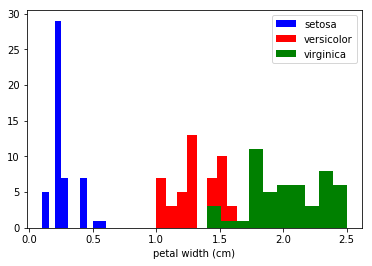

In [12]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

In [13]:
#zip函数接受任意多个（包括0个和1个）序列作为参数，返回一个tuple列表。
list(zip(range(len(iris.target_names)), colors))

[(0, 'blue'), (1, 'red'), (2, 'green')]

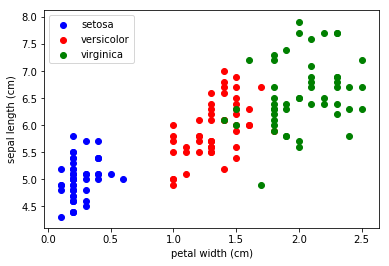

In [14]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### 快速练习:

**在上面的脚本中更改**`x_index` **和**`y_index` **,
并找到两个参数的组合,这最大限度地分离了三个类。**

这个练习是**降维**的预览，我们稍后会看到。

### 散点图矩阵

分析师使用的通用工具不是一次一个地看数据，而是称为**散点图矩阵**。

散点图矩阵显示数据集中所有特征之间的散点图，直方图来显示每个特征的分布。

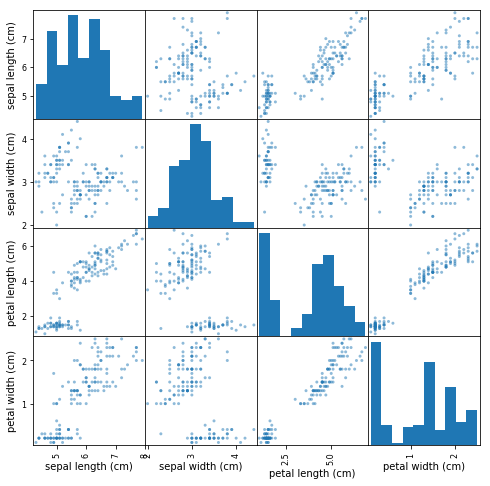

In [15]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(8, 8));

## 其他可用数据

[scikit- learn为测试学习算法提供了大量数据集](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities).
分为三种类型：
- **打包数据：**这些小数据集使用scikit-learn安装打包，可以使用sklearn.datasets.load_* 下的工具下载。
- **可下载数据：**这些较大的数据集可供下载，而scikit-learn包含简化此过程的工具。 这些工具可以在这里找到
  sklearn.datasets.fetch_*
- **生成的数据：**有几个数据集是从基于随机种子的模型生成的。 这些可以在sklearn.datasets.make_*中找到

您可以使用IPython的制表符完成功能来探索可用的数据集加载器，读取器和生成器。 从``sklearn``导入``datasets``子模块后，

输入

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>
    
查看可用函数的列表。

In [16]:
from sklearn import datasets

In [17]:
datasets.make

AttributeError: module 'sklearn.datasets' has no attribute 'load_'

使用``fetch_``脚本下载的数据本地存储在您的主目录的子目录中。您可以使用以下内容来确定它的位置：

In [16]:
from sklearn.datasets import get_data_home
get_data_home()

'C:\\Users\\hc\\scikit_learn_data'

In [ ]:
datasets.fetch_

提醒：这些数据集中的很多数据量都很大，可能需要很长时间才能下载！

如果您在IPython笔记本中开始下载，并且想要终止它，则可以使用ipython的“内核中断”功能，可以在菜单中使用或使用快捷键``Ctrl-m i``。

您可以按下``Ctrl-m h``来查看所有``ipython``键盘快捷键的列表。

## 加载Digits Data

现在我们来看看另外一个数据集，在这个数据集中，我们必须更多地考虑如何表示数据。 我们可以用与上面类似的方式来探索数据：

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
digits.keys()

dict_keys(['images', 'target', 'DESCR', 'target_names', 'data'])

In [19]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [23]:
print(digits.data[0])
print(digits.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


这里的目标是由数字值表示的手写数字（0~9）。
数据是一个长度为64的数组。
但这些数据意味着什么呢?

有一个线索，我们有两个版本的数据数组：“数据”和“图像”。 我们来看看他们：

In [21]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


我们可以看到，他们是通过一个简单的reshape相关的：

In [22]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


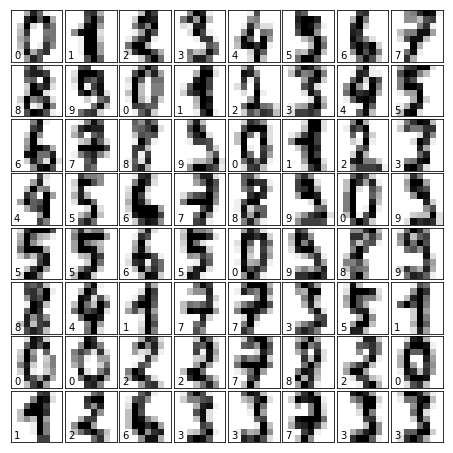

In [23]:
# 设置图参数
fig = plt.figure(figsize=(6, 6))  # 数字大小以英寸为单位
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 绘制数字：每个图像是8x8像素
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # 用目标值标记图像
    ax.text(0, 7, str(digits.target[i]))

我们现在看这些特征代表的意思。 每个特征是一个实数值，表示手写数字的8x8图像中像素的黑度。

即使每个样本具有固有的二维数据，数据矩阵也会将这个二维数据平滑成一个**单个向量**，它可以包含在数据矩阵的一个**行**中。

## 生成的数据：S曲线

s -cure经常作为一个简单的非线性数据集的例子

In [25]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

(1000, 3)
(1000,)


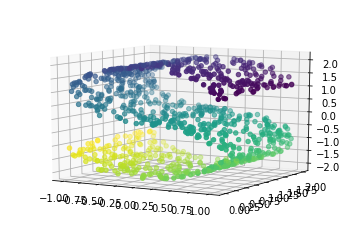

In [26]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)

此示例通常与称为局部线性嵌入的无监督学习方法一起使用。 本教程稍后将详细探讨无监督学习。